**Lab 3 Unit 4**

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

**Instructions**
1. Open the categoricals variable we created before.
    categoricals = data.select_dtypes(np.object)
    categoricals.head()
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
customer_df = pd.read_csv("/Users/clark/Desktop/ironhack/labs/unit 4/lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor           2/24/11         Employed      F   56274   
1     Bachelor           1/31/11       Unemployed      F       0   
2     Bachelor           2/19/11         Employed      F   48767   
3     Bachelor           1/20/11       Unemployed      M       0   
4     Bachelor            2/3/11         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9129  Bachelor           2/10/11         Employed      M   71941   
9130   College           2/12/11         Employed      F   21604   
9131  Bachelor            2/6/11       Unemployed      M       0   
9132   College            2/3/11         Employed      M   21941   
9133   College           2/14/11       Unemployed      M       0   

     Location Code Marital Status  Monthly Premium Auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1 

In [4]:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ", "_")
customer_df.columns = customer_df.columns.str.replace("employmentstatus","employment_status")
customer_df.columns = customer_df.columns.str.replace("customer","customer_id")
customer_df.head()

customer_id       state  customer_id_lifetime_value response  coverage  \
0     BU79786  Washington                 2763.519279       No     Basic   
1     QZ44356     Arizona                 6979.535903       No  Extended   
2     AI49188      Nevada                12887.431650       No   Premium   
3     WW63253  California                 7645.861827       No     Basic   
4     HB64268  Washington                 2813.692575       No     Basic   

  education effective_to_date employment_status gender  income location_code  \
0  Bachelor           2/24/11          Employed      F   56274      Suburban   
1  Bachelor           1/31/11        Unemployed      F       0      Suburban   
2  Bachelor           2/19/11          Employed      F   48767      Suburban   
3  Bachelor           1/20/11        Unemployed      M       0      Suburban   
4  Bachelor            2/3/11          Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

## 1. 

Open the categoricals variable we created before. categoricals = data.select_dtypes(np.object) categoricals.head()

In [5]:
# continuous variables
numerical_df = customer_df.select_dtypes(include=['float64', 'int64'])

# categorical variables
categorical_df = customer_df.select_dtypes(include=['object'])
categorical_df.head()

customer_id       state response  coverage education effective_to_date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   

  employment_status gender location_code marital_status     policy_type  \
0          Employed      F      Suburban        Married  Corporate Auto   
1        Unemployed      F      Suburban         Single   Personal Auto   
2          Employed      F      Suburban        Married   Personal Auto   
3        Unemployed      M      Suburban        Married  Corporate Auto   
4          Employed      M         Rural         Single   Personal Auto   

         policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0  Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1   Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2   Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3  Corporate L2           Offer1   Call Center            SUV      Medsize  
4   Personal L1           Offer1         Agent  Four-Door Car      Medsize

## 2. 

Plot all the categorical variables with the proper plot. What can you see?

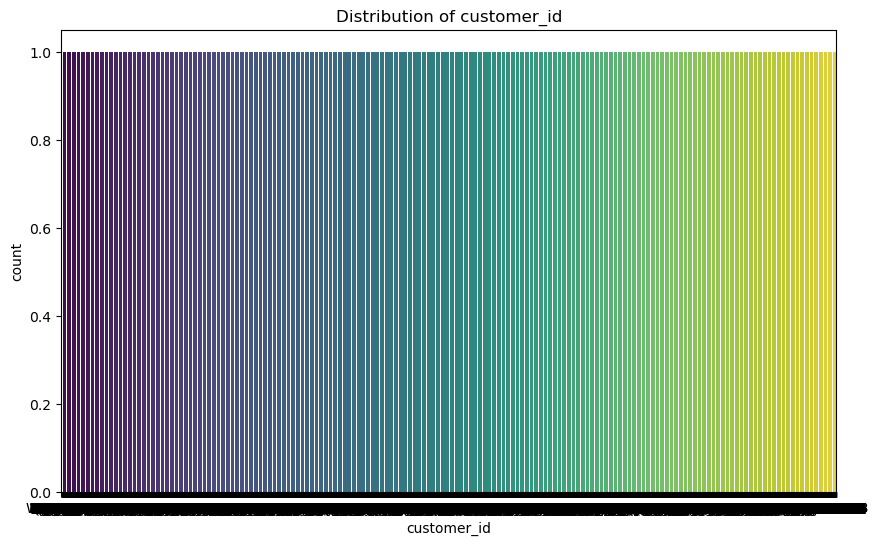

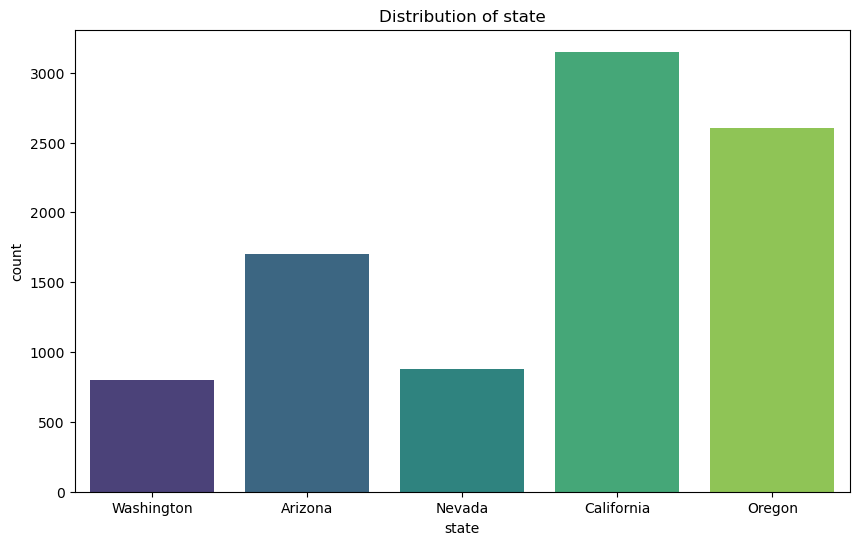

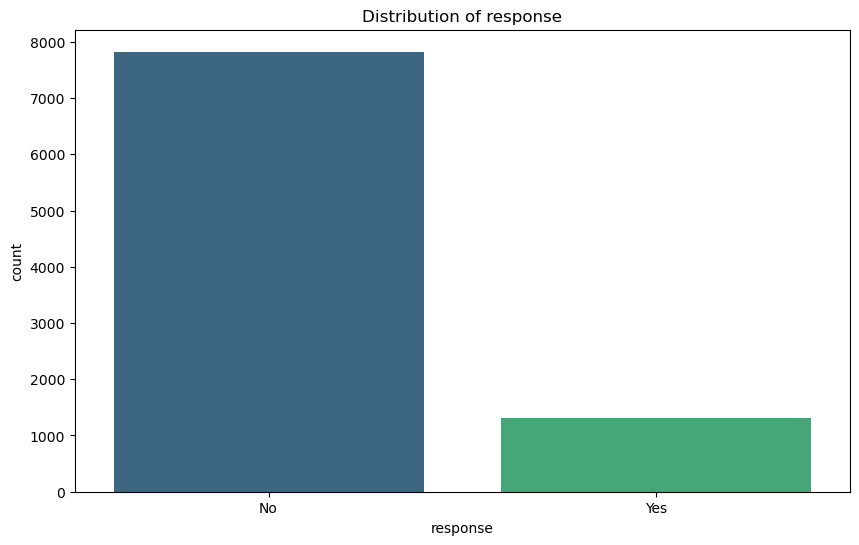

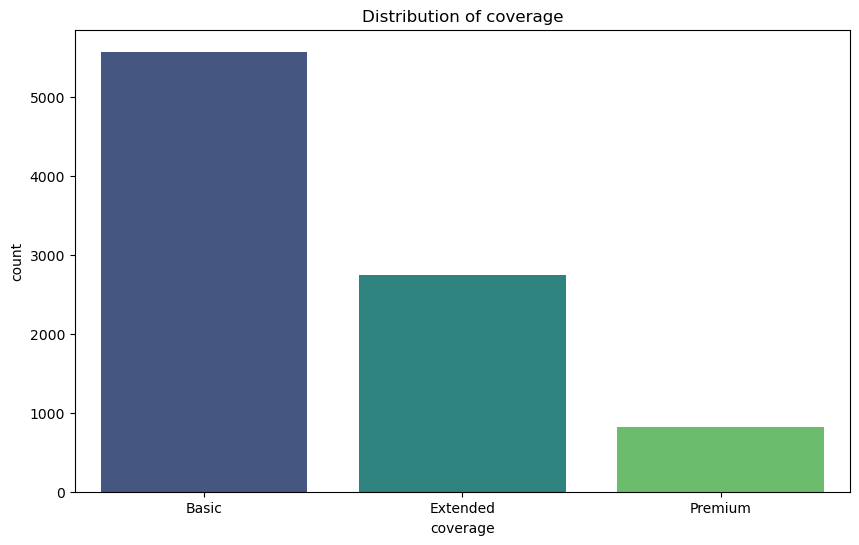

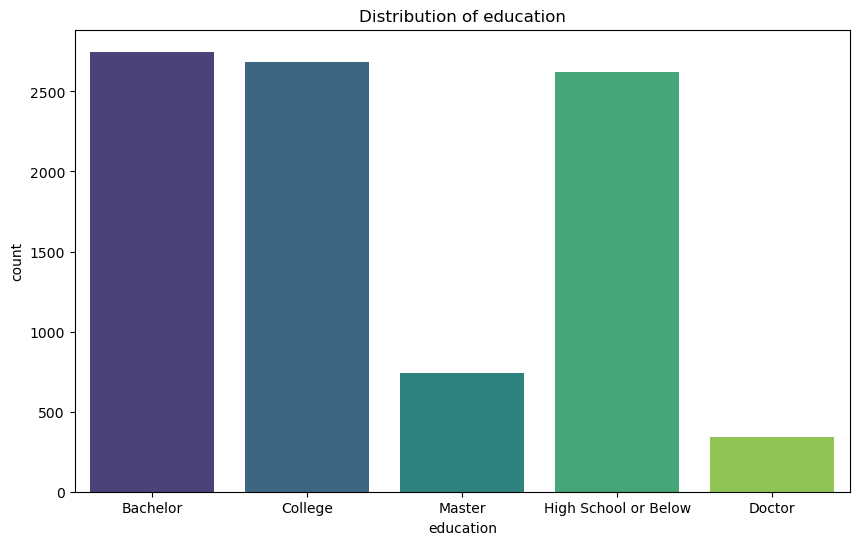

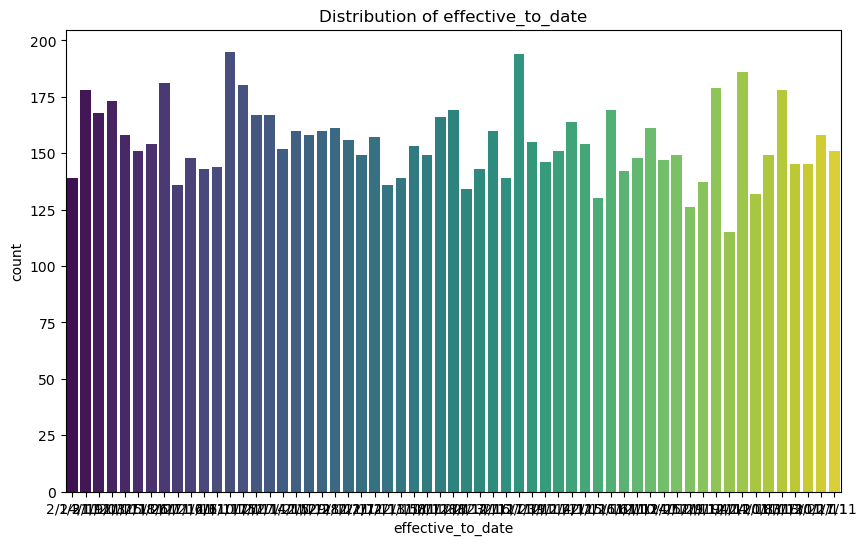

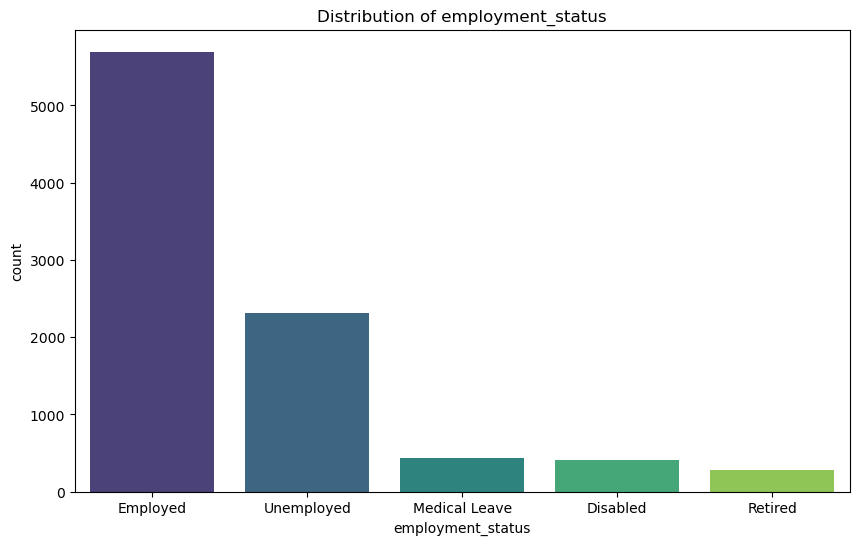

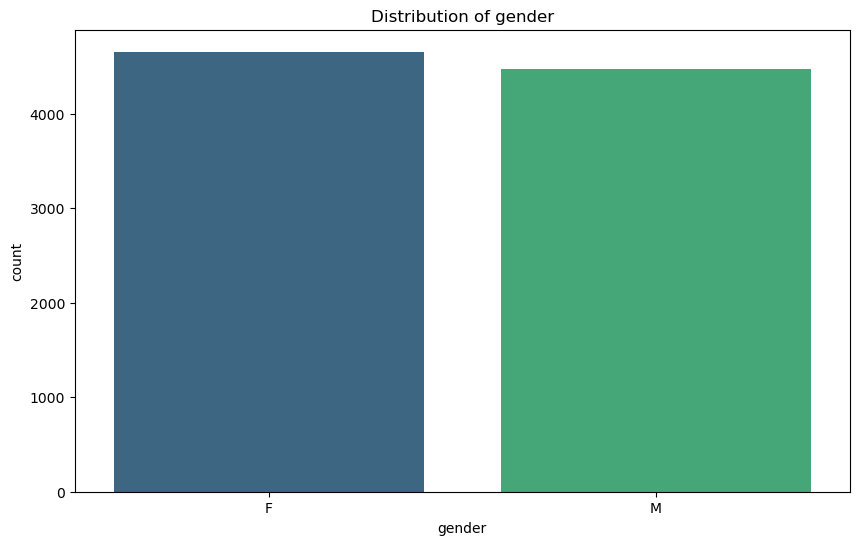

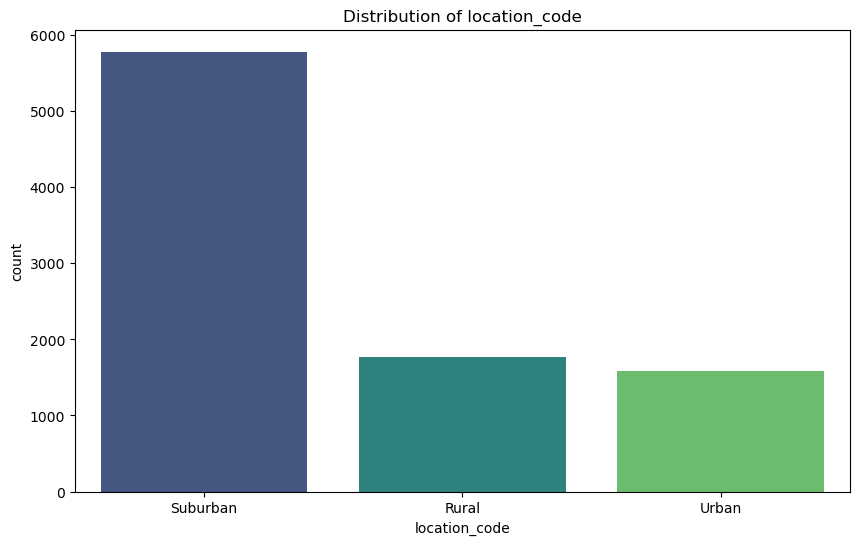

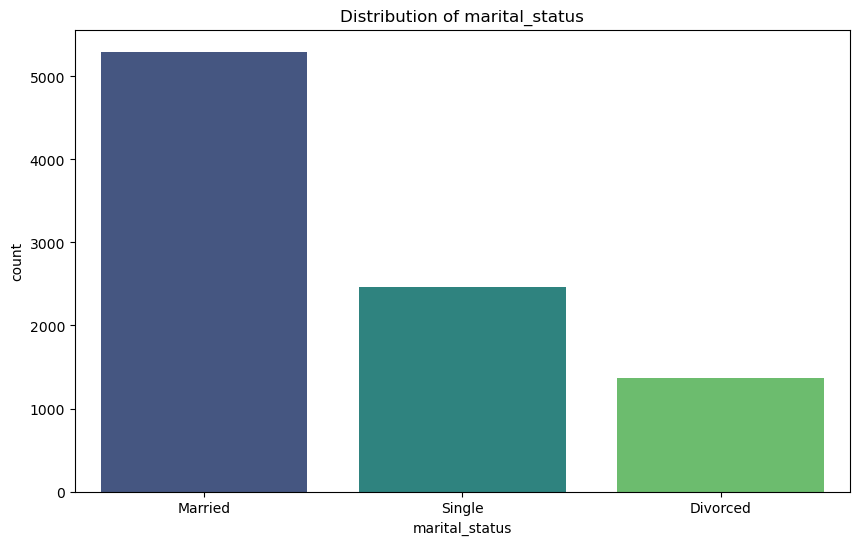

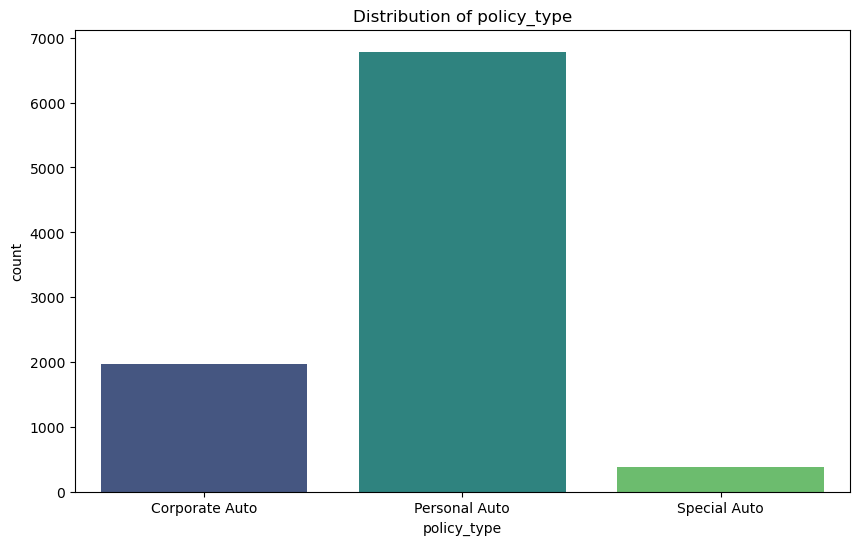

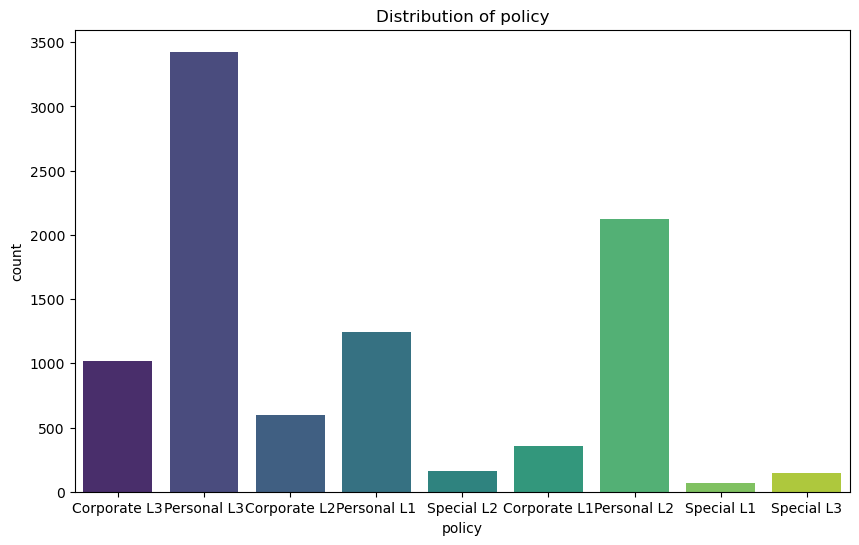

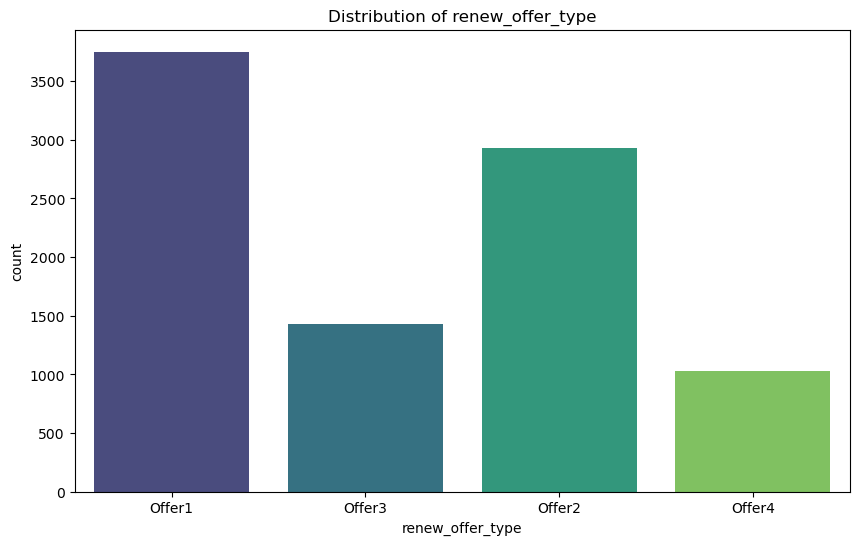

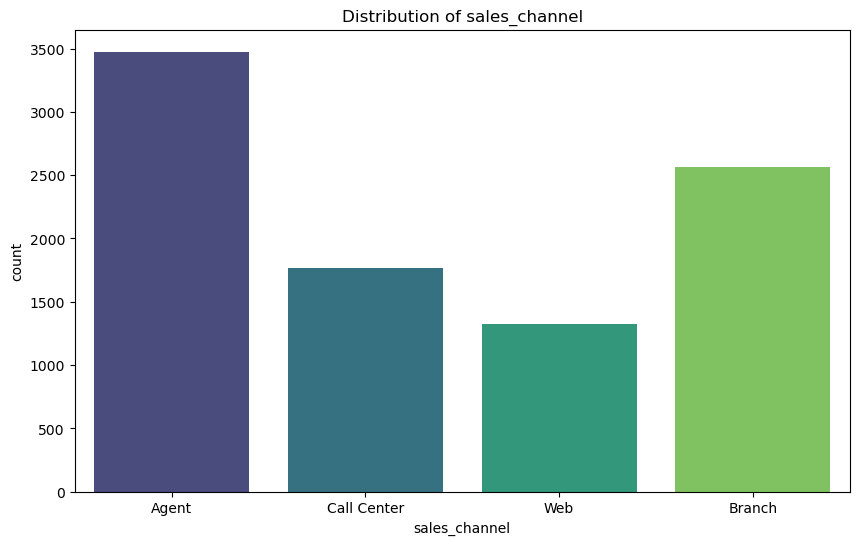

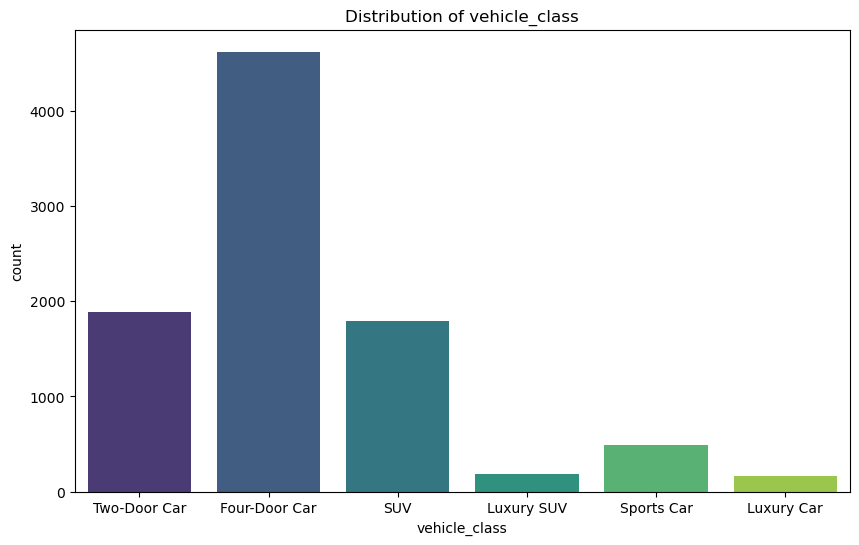

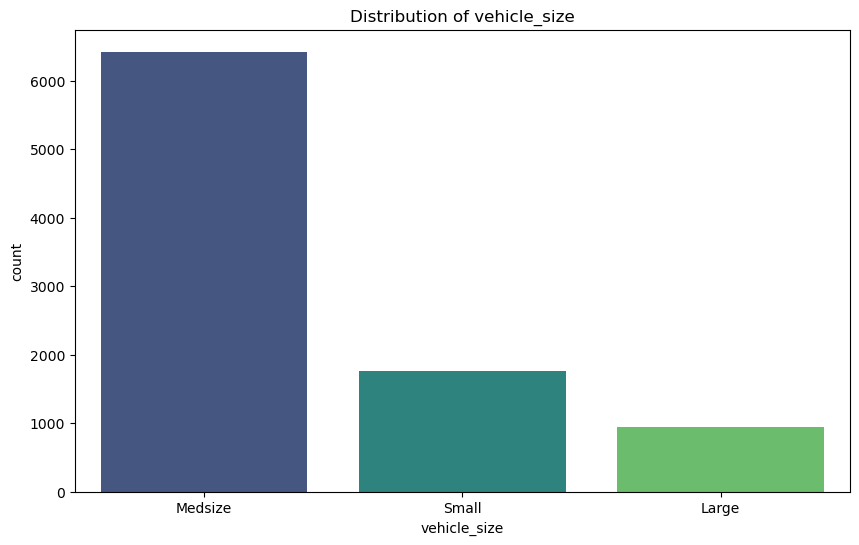

In [6]:
categorical_columns = categorical_df.select_dtypes(include='object').columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=categorical_df, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.show()
    
# There's some categorical columns that don't make sense to plot, such as the customer_id and the effective_to_date

## 3.

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [7]:
for column in categorical_df.columns:
    unique_values = categorical_df[column].unique()
    print(f"Column: {column}\nUnique Values: {unique_values}\n")


Column: customer_id
Unique Values: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']

Column: state
Unique Values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']

Column: response
Unique Values: ['No' 'Yes']

Column: coverage
Unique Values: ['Basic' 'Extended' 'Premium']

Column: education
Unique Values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Column: effective_to_date
Unique Values: ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '

In [8]:
# Replace the values of policy for just the levels

replacement = {
    'Corporate L3': 'L3',
    'Personal L3': 'L3',
    'Special L3': 'L3',
    'Corporate L2': 'L2',
    'Personal L2': 'L2',
    'Special L2': 'L2',
    'Corporate L1': 'L1',
    'Personal L1': 'L1',
    'Special L1': 'L1',
}

categorical_df['policy'] = categorical_df['policy'].replace(replacement)


In [9]:
categorical_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

## 4.

Plot time variable. Can you extract something from it?

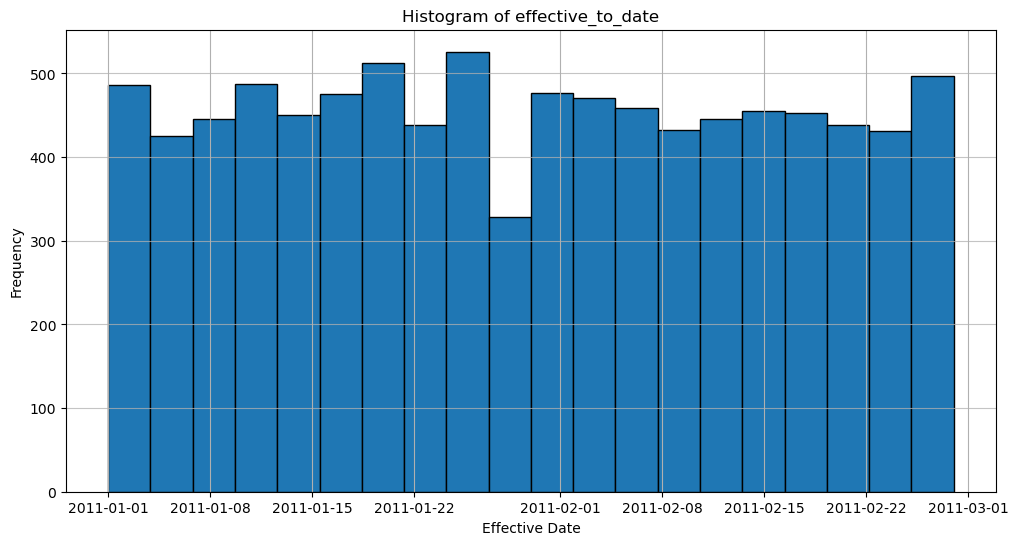

In [10]:
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])

plt.figure(figsize=(12, 6))
categorical_df['effective_to_date'].hist(bins=20, edgecolor='black')
plt.title('Histogram of effective_to_date')
plt.xlabel('Effective Date')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

<Axes: >

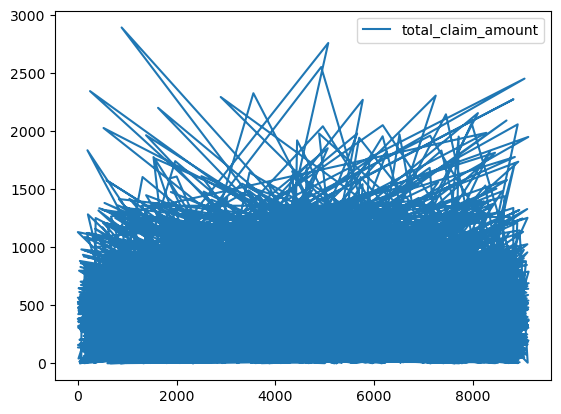

In [12]:
customer_df[['effective_to_date', 'total_claim_amount']].sort_values('effective_to_date').plot()